In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [139]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [140]:
X.shape

(150, 4)

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

In [144]:
#from sklearn.metrics import classification_report, confusion_matrix

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [145]:
#Distance Function
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

In [146]:
#Finding Neighours function
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [147]:
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [148]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [149]:
trainingSet = X_train
testInstance = X_test[0]
k = 3
neig = getNeighbors(trainingSet, testInstance, k)


In [150]:
neig

[array([ 0.65338547, -0.5585834 ,  0.85208324,  0.46654626]),
 array([ 0.91473965, -0.08520764,  1.09076202,  0.87699752]),
 array([ 0.65338547, -0.79527128,  0.73274385,  0.87699752])]

In [151]:
X_test[0]

array([ 0.78406256, -0.5585834 ,  1.15043172,  1.28744878])

In [152]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
X = iris.data
#print(X.shape)
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)

sim_mat = clf.transform()
#plt.imshow(sim_mat)

In [153]:
from sklearn.decomposition import PCA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(sim_mat)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [154]:
X1 = principalDf.iloc[:, :].values
y1 = finalDf.iloc[:, :].values

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33)

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)

X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [156]:
y1.shape

(150, 3)

In [161]:
trainingSet1 = X_train1
testInstance1 = X_test1[0]
k = 3
neig = getNeighbors(trainingSet1, testInstance1, k)

In [162]:
neig

[array([-0.63073629, -1.05129569]),
 array([-0.65264165,  1.05598039]),
 array([-0.65877537, -0.62015598])]

In [163]:
X_test1[0]

array([-0.64100833, -0.46349483])

/home/da_pj/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


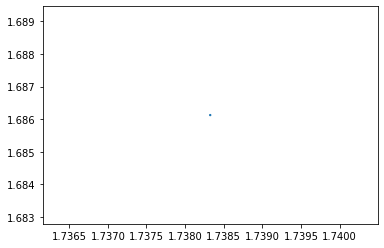

In [137]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot points
a, b, c1, c2, z1, z2, z3 = 1, 2, 3, 4, 3, 6, 3
pts = [(a,0,0),(b,0,0),(c1,c2,0),(z1,z2,z3)]
for p in pts:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')

# Plot tetrahedron
for a, b in itertools.product(pts, pts):
    x = np.linspace(a[0], b[0], 100)
    y = np.linspace(a[1], b[1], 100)
    z = np.linspace(a[2], b[2], 100)
    d = np.sqrt( sum([(a[i]-b[i])**2 for i in (0, 1, 2)]) )
    s = "%.2f" % d
    m = [(a[i]+b[i])/2. for i in (0, 1, 2)]
    ax.plot(x, y, z)
    if d>0:
        ax.text(m[0], m[1], m[2], s)
    print a, b, s

plt.show()